In [1]:
import logging
import json
import uuid
import re
from dataclasses import dataclass, field
from typing import Optional, List, Dict, Any
from livekit.agents import JobContext, WorkerOptions, cli, RoomOutputOptions
from livekit.agents.llm import function_tool
from livekit.agents.voice import Agent, AgentSession
from livekit.plugins.turn_detector.english import EnglishModel
from livekit.plugins import silero, deepgram, groq, tavus
import asyncio
from youtube_transcript_api import YouTubeTranscriptApi
from dotenv import load_dotenv
from groq import Groq


In [ ]:
logger = logging.getLogger("Chemist_Agent")
logger.setLevel(logging.INFO)


In [4]:
groq_client = Groq(api_key=GROQ_API_KEY2)

In [5]:
@dataclass
class MedicineQuestion:
    """Class to represent an interview question."""
    id: str
    question: str
    context: str

In [10]:
@dataclass
class UserData:
    """Class to store user data during a session."""
    ctx: Optional[JobContext] = None
    current_questions: List[MedicineQuestion] = field(default_factory=list)
    video_summary: Optional[str] = None
    current_question_index: int = 0
    video_topic: str = "general"

    def reset(self) -> None:
        """Reset session data."""
        self.current_questions = []
        self.video_summary = None
        self.current_question_index = 0
        self.video_topic = "Medical"

    def add_questions(self, questions: List[str], context: str, topic: str) -> None:
        """Add interview questions to the session."""
        self.current_questions = []
        for i, q in enumerate(questions):
            self.current_questions.append(MedicineQuestion(
                id=str(uuid.uuid4()),
                question=q,
                context=context,
            ))
        self.video_topic = topic

    def get_current_question(self) -> Optional[MedicineQuestion]:
        """Get the current question."""
        if 0 <= self.current_question_index < len(self.current_questions):
            return self.current_questions[self.current_question_index]
        return None

    def next_question(self) -> Optional[MedicineQuestion]:
        """Move to the next question."""
        self.current_question_index += 1
        return self.get_current_question()



image 1/1 C:\Users\aravs\Desktop\ArogyaMitra\backend\injuuu.png: 352x640 (no detections), 360.1ms
Speed: 25.9ms preprocess, 360.1ms inference, 2.1ms postprocess per image at shape (1, 3, 352, 640)


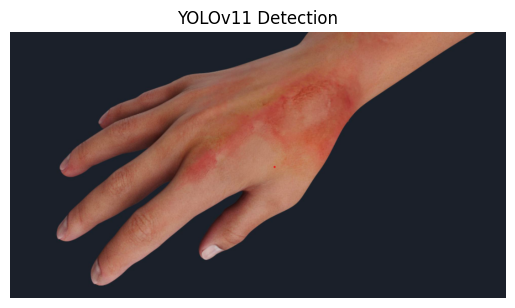

In [ ]:
from ultralytics import YOLO
from matplotlib import pyplot as plt
model = YOLO('best.pt')
results = model(r'C:\Users\aravs\Desktop\ArogyaMitra\backend\injuryyy.png')
plt.show(results)

import cv2
import numpy as np


result_img = results[0].plot()  


result_img_rgb = cv2.cvtColor(result_img, cv2.COLOR_BGR2RGB)


plt.imshow(result_img_rgb)
plt.axis('off')
plt.title('YOLOv11 Detection')
plt.show()
